In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, ttest_rel
from statsmodels.stats.anova import AnovaRM
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns
from scipy.stats import f_oneway

In [2]:
df = pd.read_csv('ad_wt_groupmatrix_summary.csv')

=== AD vs WT t-tests ===
Morning session            t = -3.299, p = 0.0058
Afternoon session          t = -3.229, p = 0.0066
Cross session              t = -3.609, p = 0.0032



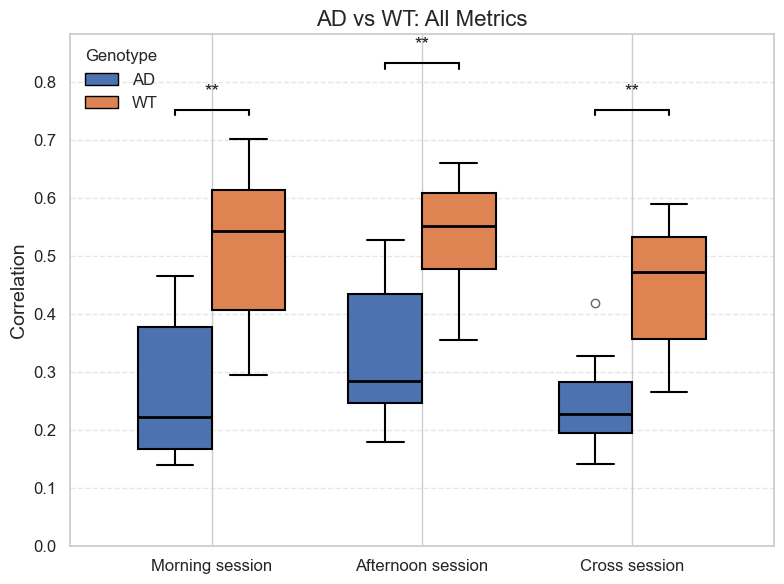

In [23]:
 # 2) Metrics and labels
metrics = [
    ('Mean_Morning_vs_Morning',     'Morning session'),
    ('Mean_Afternoon_vs_Afternoon', 'Afternoon session'),
    ('Mean_Morning_vs_Afternoon',   'Cross session')
]

# 3) Split AD/WT
data_AD = [df[df.Genotype=='AD'][m[0]].dropna().values for m in metrics]
data_WT = [df[df.Genotype=='WT'][m[0]].dropna().values for m in metrics]

# 4) t-tests
stats = {}
print("=== AD vs WT t-tests ===")
for key, label in metrics:
    ad = df[df.Genotype=='AD'][key]
    wt = df[df.Genotype=='WT'][key]
    t_stat, p_val = ttest_ind(ad, wt, nan_policy='omit')
    stats[key] = p_val
    print(f"{label:25s}  t = {t_stat:6.3f}, p = {p_val:.4f}")
print()

# 5) Plot setup
x = np.arange(len(metrics))
width = 0.35
colors = {'AD':'#4C72B0','WT':'#DD8452'}

fig, ax = plt.subplots(figsize=(8, 6))

# AD
bp1 = ax.boxplot(
    data_AD,
    positions=x - width/2,
    widths=width,
    patch_artist=True,
    boxprops=dict(facecolor=colors['AD'], edgecolor='black', linewidth=1.5),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', color=colors['AD'], alpha=0.6)
)

# WT
bp2 = ax.boxplot(
    data_WT,
    positions=x + width/2,
    widths=width,
    patch_artist=True,
    boxprops=dict(facecolor=colors['WT'], edgecolor='black', linewidth=1.5),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', color=colors['WT'], alpha=0.6)
)

# 6) Axis formatting
ax.set_xticks(x)
ax.set_xticklabels([lab for _, lab in metrics], rotation=0, fontsize=12)
ax.set_ylabel('Correlation', fontsize=14)
ax.set_title('AD vs WT: All Metrics', fontsize=16)
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.grid(True, linestyle='--', alpha=0.5)

# 7) Legend with colored patches
ad_patch = mpatches.Patch(facecolor=colors['AD'], edgecolor='black', label='AD')
wt_patch = mpatches.Patch(facecolor=colors['WT'], edgecolor='black', label='WT')
ax.legend(handles=[ad_patch, wt_patch], title='Genotype', loc='upper left', fontsize=12, frameon=False)

# 8) Expand y-limit so stars fit
all_vals = np.concatenate(data_AD + data_WT)
y_max = np.nanmax(all_vals)
ax.set_ylim(0, y_max + 0.18)              # leave ~0.18 headroom

# 9) Add brackets + stars at different heights
bracket_y = [y_max + 0.05, y_max + 0.13, y_max + 0.05]  # for metrics 0,1,2
for i, (key, _) in enumerate(metrics):
    p = stats[key]
    if p < 0.001:
        star = '***'
    elif p < 0.01:
        star = '**'
    elif p < 0.05:
        star = '*'
    else:
        star = 'ns'
    y = bracket_y[i]
    h = 0.015

    # horizontal line
    ax.plot([x[i]-width/2, x[i]+width/2], [y, y], color='black', linewidth=1.5)
    # little ticks
    ax.plot([x[i]-width/2, x[i]-width/2], [y, y-0.01], color='black', linewidth=1.5)
    ax.plot([x[i]+width/2, x[i]+width/2], [y, y-0.01], color='black', linewidth=1.5)
    # star text
    ax.text(x[i], y + h, star, ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

=== AD vs WT t-tests ===
Morning session            t = -3.299, p = 0.0058
Afternoon session          t = -3.229, p = 0.0066
Cross session              t = -3.609, p = 0.0032



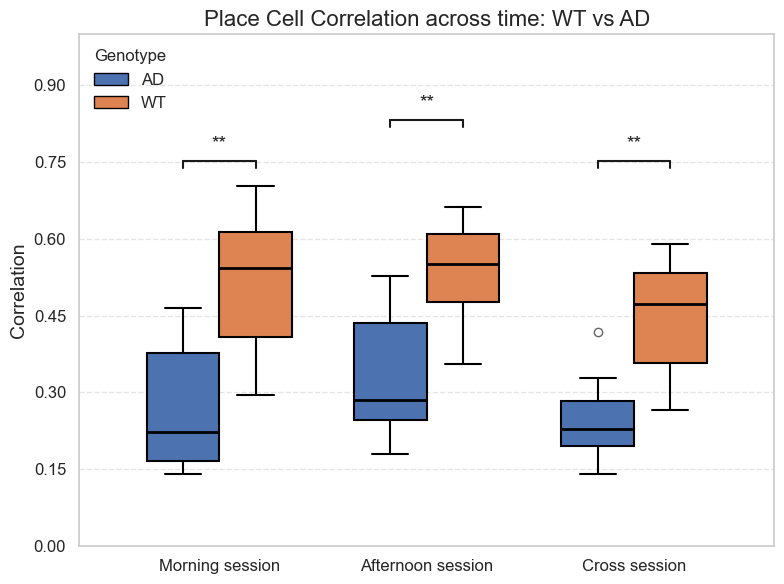

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import matplotlib.patches as mpatches

# === helper to convert p‐values to stars ===
def p_to_star(p):
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return 'ns'

# 2) Metrics and labels
metrics = [
    ('Mean_Morning_vs_Morning',     'Morning session'),
    ('Mean_Afternoon_vs_Afternoon', 'Afternoon session'),
    ('Mean_Morning_vs_Afternoon',   'Cross session')
]

# 3) Split AD/WT
data_AD = [df[df.Genotype=='AD'][key].dropna().values for key, _ in metrics]
data_WT = [df[df.Genotype=='WT'][key].dropna().values for key, _ in metrics]

# 4) t-tests
stats = {}
print("=== AD vs WT t-tests ===")
for key, label in metrics:
    ad = df[df.Genotype=='AD'][key]
    wt = df[df.Genotype=='WT'][key]
    t_stat, p_val = ttest_ind(ad, wt, nan_policy='omit')
    stats[key] = p_val
    print(f"{label:25s}  t = {t_stat:6.3f}, p = {p_val:.4f}")
print()

# 5) Plot setup
x = np.arange(len(metrics))
width = 0.35
colors = {'AD':'#4C72B0','WT':'#DD8452'}

fig, ax = plt.subplots(figsize=(8, 6))

# AD
ax.boxplot(
    data_AD,
    positions=x - width/2,
    widths=width,
    patch_artist=True,
    boxprops=dict(facecolor=colors['AD'], edgecolor='black', linewidth=1.5),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', color=colors['AD'], alpha=0.6)
)

# WT
ax.boxplot(
    data_WT,
    positions=x + width/2,
    widths=width,
    patch_artist=True,
    boxprops=dict(facecolor=colors['WT'], edgecolor='black', linewidth=1.5),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', color=colors['WT'], alpha=0.6)
)

# 6) Axis formatting
ax.set_xticks(x)
ax.set_xticklabels([lab for _, lab in metrics], rotation=0, fontsize=12)
ax.set_ylabel('Correlation', fontsize=14)
ax.set_title('Place Cell Correlation across time: WT vs AD', fontsize=16)
ax.tick_params(axis='y', labelsize=12)
ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.grid(False)

# 7) Legend with colored patches
ad_patch = mpatches.Patch(facecolor=colors['AD'], edgecolor='black', label='AD')
wt_patch = mpatches.Patch(facecolor=colors['WT'], edgecolor='black', label='WT')
ax.legend(handles=[ad_patch, wt_patch], title='Genotype', loc='upper left', fontsize=12, frameon=False)

# 8) Add brackets + stars at different heights
all_vals = np.concatenate(data_AD + data_WT)
y_max = np.nanmax(all_vals)
bracket_y = [y_max + 0.05, y_max + 0.13, y_max + 0.05]  # for metrics 0,1,2
for i, (key, _) in enumerate(metrics):
    p = stats[key]
    if p < 0.001:
        star = '***'
    elif p < 0.01:
        star = '**'
    elif p < 0.05:
        star = '*'
    else:
        star = 'ns'
    y = bracket_y[i]
    h = 0.015

    # horizontal line
    ax.plot([x[i]-width/2, x[i]+width/2], [y, y], 'k-', lw=1.5)
    # little ticks
    ax.plot([x[i]-width/2, x[i]-width/2], [y, y-h], 'k-', lw=1.5)
    ax.plot([x[i]+width/2, x[i]+width/2], [y, y-h], 'k-', lw=1.5)
    # star text
    ax.text(x[i], y + h, star, ha='center', va='bottom', fontsize=14)

# 9) Force y-axis 0–1 with 0.15 steps
ax.set_ylim(0, 1.0)
ax.set_yticks(np.arange(0, 1.01, 0.15))

plt.tight_layout()
plt.show()

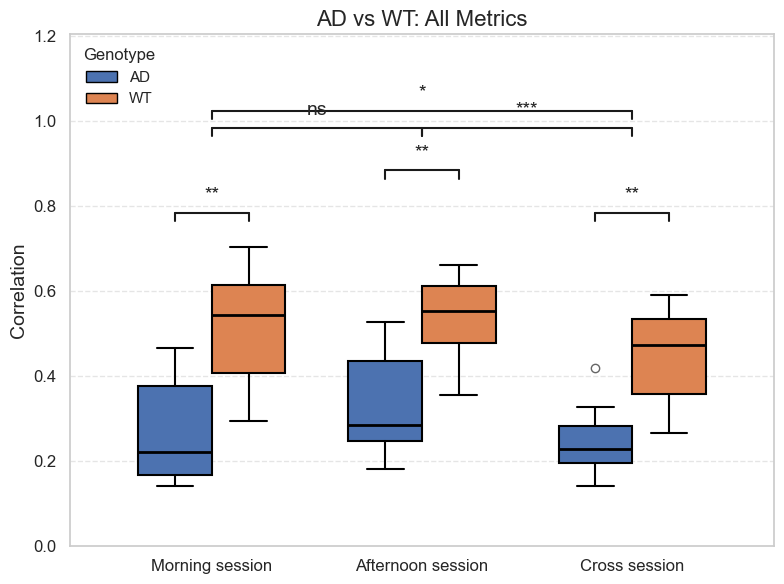

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel
import matplotlib.patches as mpatches

# 1) Metrics and labels
metrics = [
    ('Mean_Morning_vs_Morning',     'Morning session'),
    ('Mean_Afternoon_vs_Afternoon', 'Afternoon session'),
    ('Mean_Morning_vs_Afternoon',   'Cross session')
]

# 2) Split for AD/WT
data_AD = [df[df.Genotype=='AD'][key].dropna().values for key, _ in metrics]
data_WT = [df[df.Genotype=='WT'][key].dropna().values for key, _ in metrics]

# 3) AD vs WT t-tests
stats_ad_wt = {}
for key, label in metrics:
    ad = df[df.Genotype=='AD'][key]
    wt = df[df.Genotype=='WT'][key]
    _, p_val = ttest_ind(ad, wt, nan_policy='omit')
    stats_ad_wt[key] = p_val

# 4) Cross-metric paired t-tests
all_vals = [df[key].values for key, _ in metrics]
stats_metrics = {
    (0,1): ttest_rel(all_vals[0], all_vals[1], nan_policy='omit').pvalue,
    (0,2): ttest_rel(all_vals[0], all_vals[2], nan_policy='omit').pvalue,
    (1,2): ttest_rel(all_vals[1], all_vals[2], nan_policy='omit').pvalue,
}

# 5) Plot
x = np.arange(len(metrics))
width = 0.35
colors = {'AD':'#4C72B0','WT':'#DD8452'}

fig, ax = plt.subplots(figsize=(8, 6))

# AD boxes
ax.boxplot(
    data_AD,
    positions=x - width/2,
    widths=width,
    patch_artist=True,
    boxprops=dict(facecolor=colors['AD'], edgecolor='black', linewidth=1.5),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', color=colors['AD'], alpha=0.6)
)

# WT boxes
ax.boxplot(
    data_WT,
    positions=x + width/2,
    widths=width,
    patch_artist=True,
    boxprops=dict(facecolor=colors['WT'], edgecolor='black', linewidth=1.5),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', color=colors['WT'], alpha=0.6)
)

# Aesthetics
ax.set_xticks(x)
ax.set_xticklabels([lab for _, lab in metrics], rotation=0, fontsize=12)
ax.set_ylabel('Correlation', fontsize=14)
ax.set_title('AD vs WT: All Metrics', fontsize=16)
ax.tick_params(axis='y', labelsize=12)

# keep horizontal grid lines, remove vertical ones
ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.grid(False)

# Legend
ad_patch = mpatches.Patch(facecolor=colors['AD'], edgecolor='black', label='AD')
wt_patch = mpatches.Patch(facecolor=colors['WT'], edgecolor='black', label='WT')
ax.legend(handles=[ad_patch, wt_patch], title='Genotype', loc='upper left', frameon=False)

# 6) Expand y-limit so all stars fit nicely
combined = np.concatenate(data_AD + data_WT)
y_max = np.nanmax(combined)
ax.set_ylim(0, y_max + 0.5)

# 7) AD vs WT brackets
bracket_y_adwt = [y_max + 0.08, y_max + 0.18, y_max + 0.08]
for i, (key, _) in enumerate(metrics):
    p = stats_ad_wt[key]
    star = 'ns'
    if p < 0.001: star = '***'
    elif p < 0.01: star = '**'
    elif p < 0.05: star = '*'
    y = bracket_y_adwt[i]
    h = 0.02
    ax.plot([x[i]-width/2, x[i]+width/2], [y, y], 'k-', lw=1.5)
    ax.plot([x[i]-width/2]*2, [y, y-h], 'k-', lw=1.5)
    ax.plot([x[i]+width/2]*2, [y, y-h], 'k-', lw=1.5)
    ax.text(x[i], y+h, star, ha='center', va='bottom', fontsize=14)

# 8) Across-metric brackets
bracket_y_meta = {
    (0,1): y_max + 0.28,
    (0,2): y_max + 0.32,
    (1,2): y_max + 0.28
}
for (i,j), p in stats_metrics.items():
    star = 'ns'
    if p < 0.001: star = '***'
    elif p < 0.01: star = '**'
    elif p < 0.05: star = '*'
    y = bracket_y_meta[(i,j)]
    h = 0.02
    ax.plot([x[i], x[j]], [y, y], 'k-', lw=1.5)
    ax.plot([x[i], x[i]], [y, y-h], 'k-', lw=1.5)
    ax.plot([x[j], x[j]], [y, y-h], 'k-', lw=1.5)
    ax.text((x[i]+x[j])/2, y+h, star, ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

In [26]:
import pandas as pd
from scipy.stats import ttest_rel
from statsmodels.stats.multitest import multipletests

# 1) Reconstruct your DataFrame
data = {
    'MouseID': [
        'm4005','m4020','m4202','m4232','m4602','m4609','m4610',
        'm4098','m4101','m4201','m4230','m4376','m4578','m4604','m4605'
    ],
    'Genotype': ['AD']*7 + ['WT']*8,
    'Mean_Morning_vs_Morning': [
        0.1824,0.4652,0.3994,0.2218,0.1396,0.1506,0.3547,
        0.3393,0.6079,0.4302,0.5900,0.6332,0.6057,0.2947,0.4965
    ],
    'Mean_Afternoon_vs_Afternoon': [
        0.2841,0.5275,0.4459,0.4251,0.2659,0.2275,0.1796,
        0.4233,0.6550,0.4950,0.5950,0.6616,0.5102,0.3545,0.5936
    ],
    'Mean_Morning_vs_Afternoon': [
        0.2276,0.4188,0.3274,0.2378,0.2140,0.1408,0.1754,
        0.3378,0.5800,0.3630,0.4850,0.5906,0.5282,0.2651,0.4608
    ]
}
df = pd.DataFrame(data)

# 2) Set up
metrics = [
    'Mean_Morning_vs_Morning',
    'Mean_Afternoon_vs_Afternoon',
    'Mean_Morning_vs_Afternoon'
]
labels = ['MvM','AvA','MvA']
pairs  = [(0,1),(0,2),(1,2)]
corr_method = 'bonferroni'

# 3) Run and print
for geno in ['AD','WT']:
    grp = df[df.Genotype==geno]
    # extract each metric as a vector
    arrs = [grp[m].values for m in metrics]
    
    # paired t‐tests
    t_stats, p_unc = [], []
    for i,j in pairs:
        t, p = ttest_rel(arrs[i], arrs[j])
        t_stats.append(t)
        p_unc.append(p)
    
    # multiple‐comparison correction
    reject, p_corr, _, _ = multipletests(p_unc, method=corr_method)
    
    # report
    print(f"\n--- {geno} mice post-hoc (paired t-tests, {corr_method} corrected) ---")
    for (i,j), t, pu, pc, rej in zip(pairs, t_stats, p_unc, p_corr, reject):
        print(f"{labels[i]} vs {labels[j]:6s}  t = {t:6.3f},  p_unc = {pu:.4f},  p_{corr_method} = {pc:.4f},  sig = {rej}")


--- AD mice post-hoc (paired t-tests, bonferroni corrected) ---
MvM vs AvA     t = -1.426,  p_unc = 0.2038,  p_bonferroni = 0.6115,  sig = False
MvM vs MvA     t =  0.766,  p_unc = 0.4729,  p_bonferroni = 1.0000,  sig = False
AvA vs MvA     t =  3.965,  p_unc = 0.0074,  p_bonferroni = 0.0222,  sig = True

--- WT mice post-hoc (paired t-tests, bonferroni corrected) ---
MvM vs AvA     t = -1.691,  p_unc = 0.1347,  p_bonferroni = 0.4042,  sig = False
MvM vs MvA     t =  4.160,  p_unc = 0.0042,  p_bonferroni = 0.0127,  sig = True
AvA vs MvA     t =  5.005,  p_unc = 0.0016,  p_bonferroni = 0.0047,  sig = True



AD Tukey HSD
             Multiple Comparison of Means - Tukey HSD, FWER=0.05            
       group1             group2      meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------
Afternoon–Afternoon Morning–Afternoon  -0.0877 0.3762 -0.2509 0.0755  False
Afternoon–Afternoon   Morning–Morning  -0.0631 0.5941 -0.2263 0.1001  False
  Morning–Afternoon   Morning–Morning   0.0246 0.9223 -0.1387 0.1878  False
---------------------------------------------------------------------------


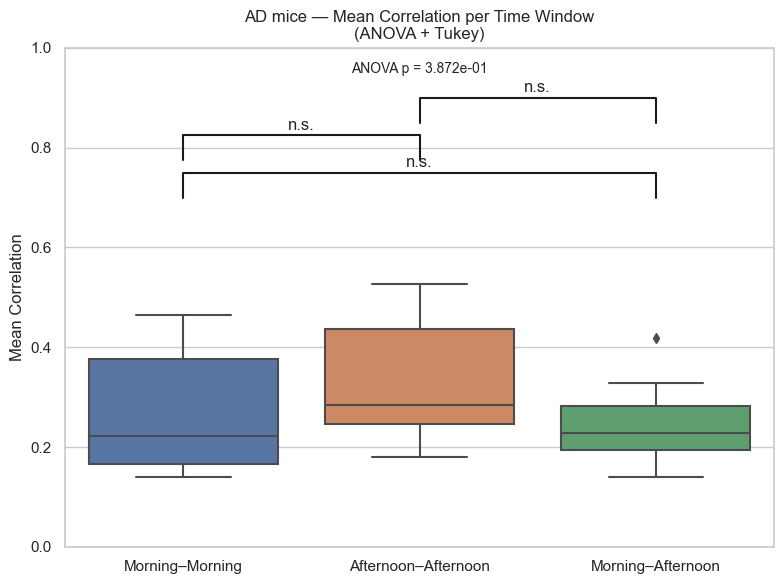


WT Tukey HSD
             Multiple Comparison of Means - Tukey HSD, FWER=0.05            
       group1             group2      meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------
Afternoon–Afternoon Morning–Afternoon  -0.0847 0.3557 -0.2365 0.0671  False
Afternoon–Afternoon   Morning–Morning  -0.0363 0.8198 -0.1881 0.1155  False
  Morning–Afternoon   Morning–Morning   0.0484 0.7052 -0.1034 0.2002  False
---------------------------------------------------------------------------


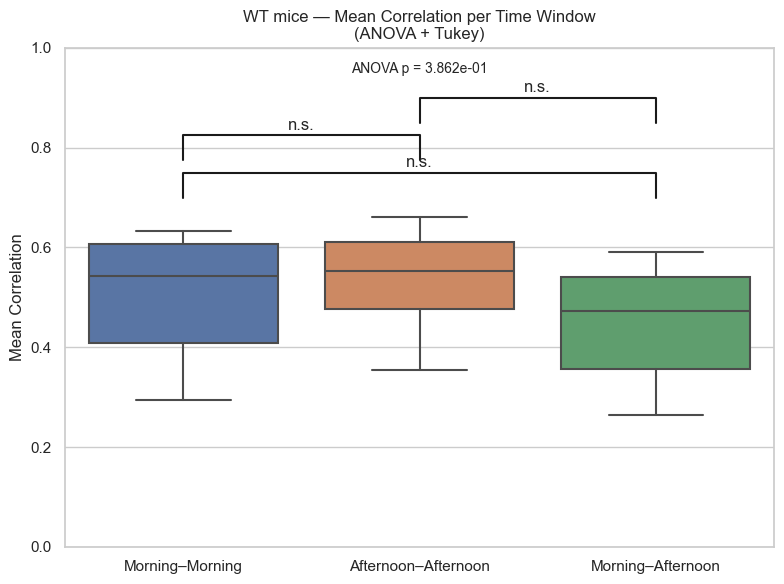

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


#df.columns = df.columns.str.strip()   # remove leading/trailing spaces

# 2) p-to-star helper
def p_to_star(p):
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return 'n.s.'

sns.set(style='whitegrid')

# 3) Loop over genotypes
for genotype in ['AD', 'WT']:
    subdf = df[df['Genotype'] == genotype]   # now should work

    # 4) Prepare data
    keys   = ['Mean_Morning_vs_Morning',
              'Mean_Afternoon_vs_Afternoon',
              'Mean_Morning_vs_Afternoon']
    labels = ['Morning–Morning', 'Afternoon–Afternoon', 'Morning–Afternoon']
    data   = [subdf[k].dropna().values for k in keys]

    # 5) Plot base boxplot
    plt.figure(figsize=(8,6))
    ax = sns.boxplot(data=data)
    ax.set_xticklabels(labels)
    plt.title(f"{genotype} mice — Mean Correlation per Time Window\n(ANOVA + Tukey)")
    plt.ylabel("Mean Correlation")
    plt.ylim(0,1)

    # 6) One-way ANOVA
    f_stat, p_val = f_oneway(*data)
    ax.text(1, 0.95, f"ANOVA p = {p_val:.3e}", ha='center', fontsize=10)

    # 7) Tukey post-hoc
    flat      = np.concatenate(data)
    group_lbl = np.concatenate([[labels[i]] * len(data[i]) for i in range(len(data))])
    if len(np.unique(group_lbl)) > 1:
        tukey = pairwise_tukeyhsd(endog=flat, groups=group_lbl, alpha=0.05)
        print(f"\n{genotype} Tukey HSD\n", tukey)

        # annotate each pair
        line_height  = 0.85
        spacing      = 0.05
        for row in tukey.summary().data[1:]:
            g1, g2, meandiff, p_adj, lower, upper, reject = row
            x1 = labels.index(g1)
            x2 = labels.index(g2)

            # bracket
            ax.plot([x1, x1, x2, x2],
                    [line_height, line_height+spacing, line_height+spacing, line_height],
                    lw=1.5, c='k')
            # star
            ax.text((x1+x2)/2, line_height+spacing*1.1, p_to_star(float(p_adj)),
                    ha='center', va='bottom', fontsize=12)
            line_height -= spacing * 1.5

    plt.tight_layout()
    plt.savefig(f"{genotype}_boxplot_with_ANOVA_Tukey.png", dpi=300)
    plt.show()


=== AD mice ===
Morning session vs Afternoon session: t = -1.426, p_unc = 0.2038, p_bonf = 0.6115
Morning session vs cross session: t = 0.766, p_unc = 0.4729, p_bonf = 1.0000
Afternoon session vs cross session: t = 3.965, p_unc = 0.0074, p_bonf = 0.0222


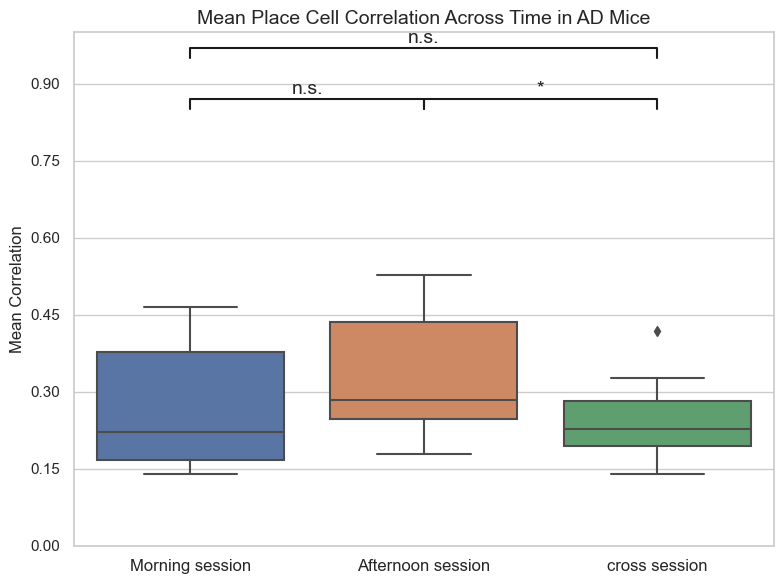


=== WT mice ===
Morning session vs Afternoon session: t = -0.739, p_unc = 0.4839, p_bonf = 1.0000
Morning session vs cross session: t = 2.987, p_unc = 0.0203, p_bonf = 0.0609
Afternoon session vs cross session: t = 5.435, p_unc = 0.0010, p_bonf = 0.0029


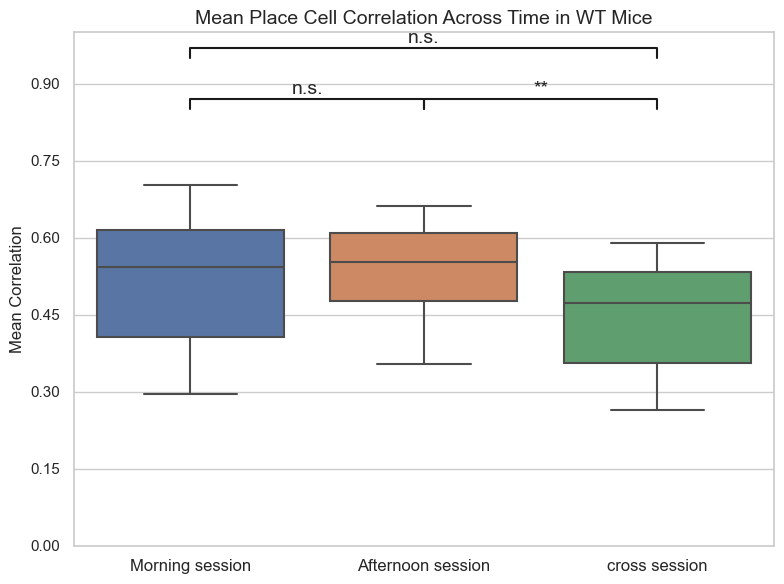

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# helper to convert p-values to stars
def p_to_star(p):
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return 'n.s.'

# common settings
metrics = [
    'Mean_Morning_vs_Morning',
    'Mean_Afternoon_vs_Afternoon',
    'Mean_Morning_vs_Afternoon'
]
labels  = ['Morning session','Afternoon session','cross session']
pairs   = [(0,1),(0,2),(1,2)]
palette = ['#4C72B0','#DD8452','#55A868']
heights = {(0,1):0.85, (0,2):0.95, (1,2):0.85}
h       = 0.02

sns.set(style='whitegrid')

for genotype in ['AD','WT']:
    print(f"\n=== {genotype} mice ===")
    sub = df[df['Genotype'] == genotype]
    data = [sub[m].dropna().values for m in metrics]

    # paired t-tests
    p_unc = []
    t_vals = []
    for i, j in pairs:
        t_stat, p = ttest_rel(data[i], data[j], nan_policy='omit')
        t_vals.append(t_stat)
        p_unc.append(p)

    p_corr = np.minimum(np.array(p_unc) * len(pairs), 1.0)

    # print results
    for (i, j), t, p_raw, p_bonf in zip(pairs, t_vals, p_unc, p_corr):
        print(f"{labels[i]} vs {labels[j]}: t = {t:.3f}, p_unc = {p_raw:.4f}, p_bonf = {p_bonf:.4f}")

    # plot
    plt.figure(figsize=(8,6))
    ax = sns.boxplot(data=data, palette=palette)
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_ylabel('Mean Correlation', fontsize=12)
    ax.set_title(f"Mean Place Cell Correlation Across Time in {genotype} Mice", fontsize=14)
    ax.set_ylim(0,1)
    ax.set_yticks(np.arange(0,1.01,0.15))

    # annotate brackets
    for (i,j), p in zip(pairs, p_corr):
        y = heights[(i,j)]
        star = p_to_star(p)
        ax.plot([i,i,j,j], [y,y+h,y+h,y], 'k-', lw=1.5)
        ax.text((i+j)/2, y+h*1.1, star, ha='center', va='bottom', fontsize=14)

    plt.tight_layout()
    plt.show()

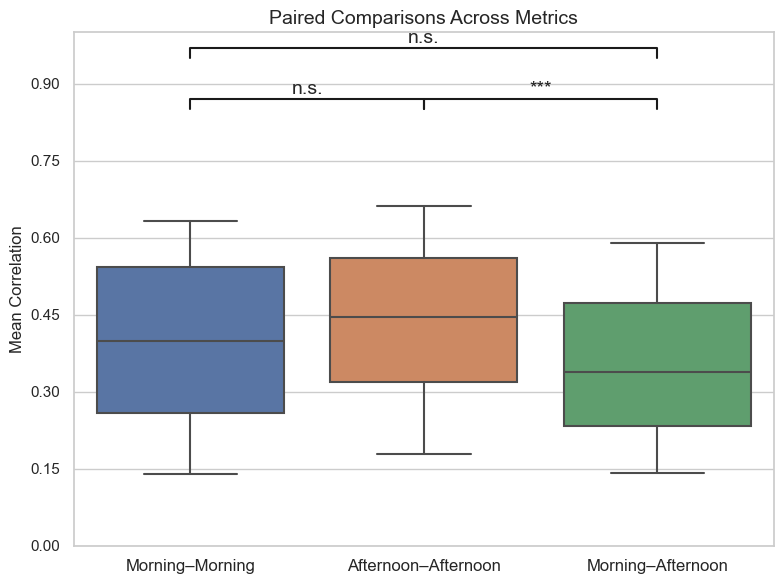

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# assume `df` is already loaded and has the columns:
# 'Mean_Morning_vs_Morning', 'Mean_Afternoon_vs_Afternoon', 'Mean_Morning_vs_Afternoon'

# 1) helper to convert p‐values to stars
def p_to_star(p):
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return 'n.s.'

# 2) pull out the three paired vectors
metrics = [
    'Mean_Morning_vs_Morning',
    'Mean_Afternoon_vs_Afternoon',
    'Mean_Morning_vs_Afternoon'
]
labels = ['Morning–Morning','Afternoon–Afternoon','Morning–Afternoon']
data   = [ df[m].dropna().values for m in metrics ]

# 3) perform paired t‐tests
pairs   = [(0,1),(0,2),(1,2)]
p_unc   = []
t_stats = []
for i,j in pairs:
    t, p = ttest_rel(data[i], data[j], nan_policy='omit')
    t_stats.append(t)
    p_unc.append(p)
# Bonferroni‐correct
p_corr = np.minimum(np.array(p_unc) * len(pairs), 1.0)

# 4) draw the boxplot
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
ax = sns.boxplot(data=data, palette=['#4C72B0','#DD8452','#55A868'])
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylabel('Mean Correlation', fontsize=12)
ax.set_title('Paired Comparisons Across Metrics', fontsize=14)
ax.set_ylim(0,1)
ax.set_yticks(np.arange(0,1.01,0.15))

# 5) annotate each pair with its star
heights = { (0,1):0.85, (0,2):0.95, (1,2):0.85 }
h = 0.02
for (i,j), p in zip(pairs, p_corr):
    x1, x2 = i, j
    y = heights[(i,j)]
    star = p_to_star(p)
    # draw bracket
    ax.plot([x1, x1, x2, x2],
            [y, y+h, y+h, y],
            lw=1.5, c='k')
    ax.text((x1+x2)/2, y+h*1.1, star, ha='center', va='bottom', fontsize=14)

plt.tight_layout()
plt.show()

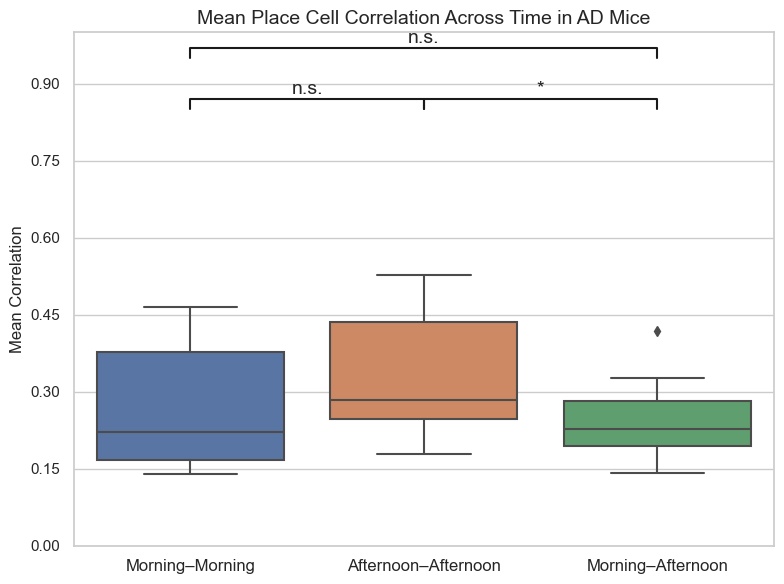

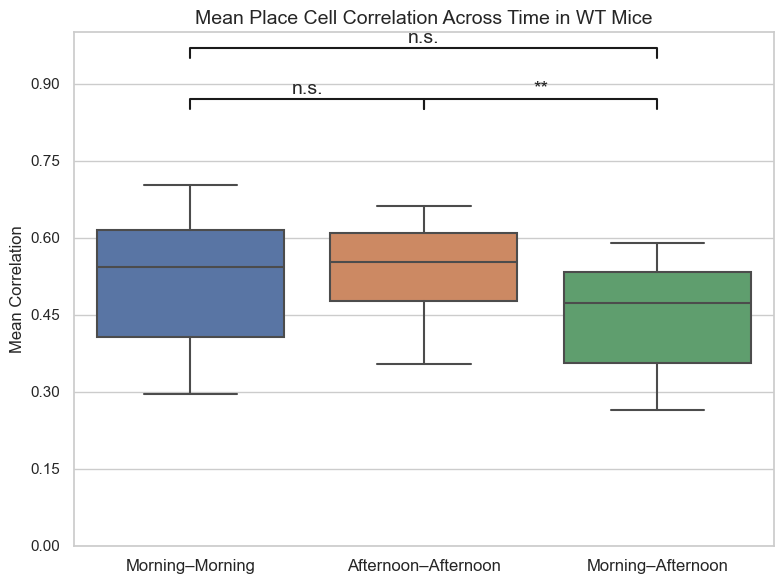

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# helper to convert p‐values to stars
def p_to_star(p):
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return 'n.s.'

# common settings
metrics = [
    'Mean_Morning_vs_Morning',
    'Mean_Afternoon_vs_Afternoon',
    'Mean_Morning_vs_Afternoon'
]
labels  = ['Morning–Morning','Afternoon–Afternoon','Morning–Afternoon']
pairs   = [(0,1),(0,2),(1,2)]
palette = ['#4C72B0','#DD8452','#55A868']
heights = {(0,1):0.85, (0,2):0.95, (1,2):0.85}
h       = 0.02

sns.set(style='whitegrid')

for genotype in ['AD','WT']:
    sub = df[df['Genotype'] == genotype]
    data = [sub[m].dropna().values for m in metrics]

    # paired t-tests
    p_unc = []
    for i,j in pairs:
        _, p = ttest_rel(data[i], data[j], nan_policy='omit')
        p_unc.append(p)
    p_corr = np.minimum(np.array(p_unc) * len(pairs), 1.0)

    # plot
    plt.figure(figsize=(8,6))
    ax = sns.boxplot(data=data, palette=palette)
    ax.set_xticklabels(labels, fontsize=12)
    ax.set_ylabel('Mean Correlation', fontsize=12)
    ax.set_title(f"Mean Place Cell Correlation Across Time in {genotype} Mice", fontsize=14)
    ax.set_ylim(0,1)
    ax.set_yticks(np.arange(0,1.01,0.15))

    # annotate brackets
    for (i,j), p in zip(pairs, p_corr):
        y = heights[(i,j)]
        star = p_to_star(p)
        ax.plot([i,i,j,j], [y,y+h,y+h,y], 'k-', lw=1.5)
        ax.text((i+j)/2, y+h*1.1, star, ha='center', va='bottom', fontsize=14)

    plt.tight_layout()
    plt.show()

Mean_Overall: AD vs WT → t = -3.650, p = 0.0029, star = **


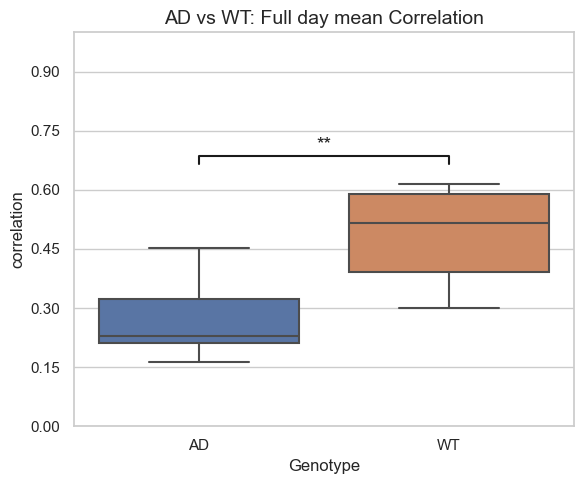

Mean_Overall_Correlation:
  WT = 0.4865
  AD = 0.2733
  Change = -43.83%
  t = -3.650, p = 0.0029, star = **


In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# === helper to convert p‐values to stars ===
def p_to_star(p):
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return 'n.s.'

sns.set(style='whitegrid')

# === 1) extract the two groups ===
ad_vals = df.loc[df.Genotype=='AD', 'Mean_Overall'].dropna().values
wt_vals = df.loc[df.Genotype=='WT', 'Mean_Overall'].dropna().values

# === 2) independent‐samples t‐test ===
t_stat, p_val = ttest_ind(ad_vals, wt_vals, nan_policy='omit')
print(f"Mean_Overall: AD vs WT → t = {t_stat:.3f}, p = {p_val:.4f}, star = {p_to_star(p_val)}")

# === 3) plot ===
plt.figure(figsize=(6,5))
ax = sns.boxplot(x='Genotype',
                 y='Mean_Overall',
                 data=df,
                 order=['AD','WT'],
                 palette=['#4C72B0','#DD8452'])
ax.set_ylabel('correlation', fontsize=12)
ax.set_title('AD vs WT: Full day mean Correlation', fontsize=14)

# === 4) annotate significance ===
x1, x2 = 0, 1
y_max    = max(ad_vals.max(), wt_vals.max())
y        = y_max + 0.05
h        = 0.02
star     = p_to_star(p_val)

# draw bracket
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='k')
ax.text((x1+x2)/2, y+h*1.2, star, ha='center', va='bottom', fontsize=14)

# === 5) force y-axis 0–1 with 0.15 increments ===
ax.set_ylim(0, 1.0)
ax.set_yticks(np.arange(0, 1.01, 0.15))

plt.tight_layout()
plt.show()

# === 3) compute mean change ===
mean_ad = np.mean(ad_vals)
mean_wt = np.mean(wt_vals)
percent_change = ((mean_ad - mean_wt) / mean_wt) * 100

print(f"Mean_Overall_Correlation:")
print(f"  WT = {mean_wt:.4f}")
print(f"  AD = {mean_ad:.4f}")
print(f"  Change = {percent_change:.2f}%")
print(f"  t = {t_stat:.3f}, p = {p_val:.4f}, star = {p_to_star(p_val)}")

Mean_Overall_Correlation:
  WT = 0.2301
  AD = 0.3982
  Change = 73.07%
  t = 1.053, p = 0.3113, star = n.s.


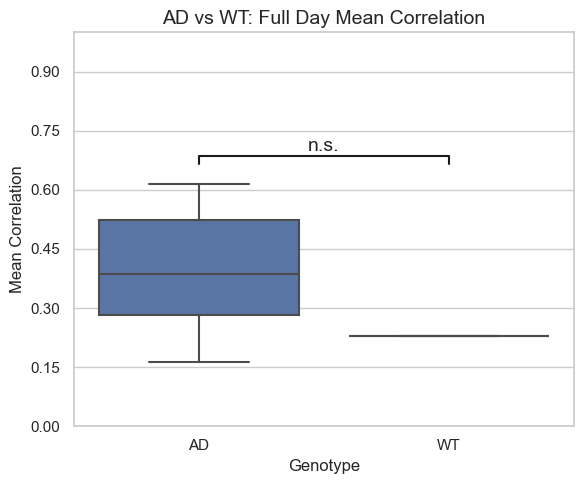

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# === helper to convert p‐values to stars ===
def p_to_star(p):
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return 'n.s.'

sns.set(style='whitegrid')

# === 1) extract the two groups ===
ad_vals = df.loc[df.Genotype == 'AD', 'Mean_Overall_Correlation'].dropna().values
wt_vals = df.loc[df.Genotype == 'WT', 'Mean_Overall_Correlation'].dropna().values

# === 2) independent‐samples t‐test ===
t_stat, p_val = ttest_ind(ad_vals, wt_vals, nan_policy='omit')

# === 3) compute mean change ===
mean_ad = np.mean(ad_vals)
mean_wt = np.mean(wt_vals)
percent_change = ((mean_ad - mean_wt) / mean_wt) * 100

print(f"Mean_Overall_Correlation:")
print(f"  WT = {mean_wt:.4f}")
print(f"  AD = {mean_ad:.4f}")
print(f"  Change = {percent_change:.2f}%")
print(f"  t = {t_stat:.3f}, p = {p_val:.4f}, star = {p_to_star(p_val)}")

# === 4) plot ===
plt.figure(figsize=(6, 5))
ax = sns.boxplot(x='Genotype',
                 y='Mean_Overall_Correlation',
                 data=df,
                 order=['AD', 'WT'],
                 palette=['#4C72B0', '#DD8452'])
ax.set_ylabel('Mean Correlation', fontsize=12)
ax.set_title('AD vs WT: Full Day Mean Correlation', fontsize=14)

# === 5) annotate significance ===
x1, x2 = 0, 1
y_max = max(ad_vals.max(), wt_vals.max())
y = y_max + 0.05
h = 0.02
star = p_to_star(p_val)

# draw bracket
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c='k')
ax.text((x1+x2)/2, y+h*1.2, star, ha='center', va='bottom', fontsize=14)

# === 6) y-axis formatting ===
ax.set_ylim(0, 1.0)
ax.set_yticks(np.arange(0, 1.01, 0.15))

plt.tight_layout()
plt.show()

Repeated-measures ANOVA:
          F Value  Num DF  Den DF    Pr > F
Session  4.603696     2.0    28.0  0.018681

Paired t-tests (Bonferroni corrected):
Morning session vs Afternoon session  t = -1.596, p_unc = 0.1328, p_bonf = 0.3985
Morning session vs Full Day  t =  0.908, p_unc = 0.3791, p_bonf = 1.0000
Afternoon session vs Full Day  t =  4.149, p_unc = 0.0010, p_bonf = 0.0030


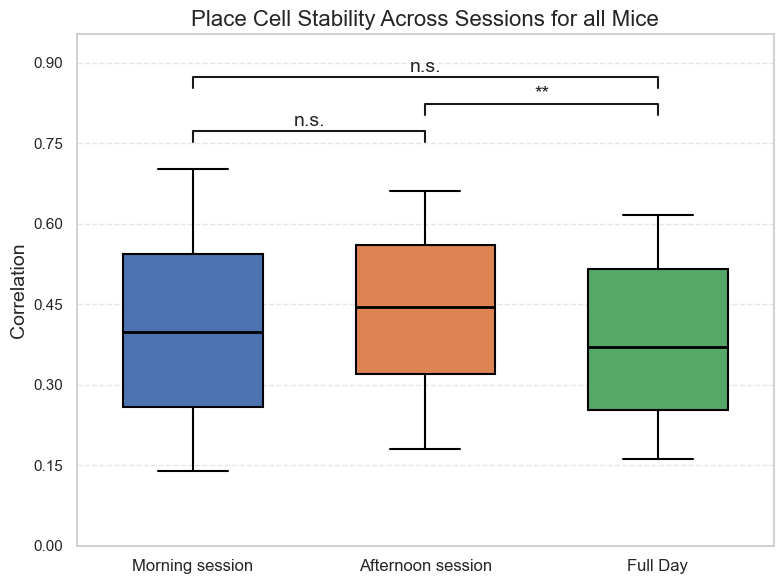

In [34]:
# 2) Define the three “sessions”
keys   = ['Mean_Morning_vs_Morning',
          'Mean_Afternoon_vs_Afternoon',
          'Mean_Overall']
labels = ['Morning session', 'Afternoon session', 'Full Day']
colors = ['#4C72B0','#DD8452','#55A868']

# 3) Repeated-measures ANOVA
# Melt to long form
long = df.melt(id_vars='MouseID', value_vars=keys,
               var_name='Session', value_name='Correlation')
long['Session'] = long['Session'].map({
    'Mean_Morning_vs_Morning':'Morning',
    'Mean_Afternoon_vs_Afternoon':'Afternoon',
    'Mean_Overall':'Full Day'
})
aov = AnovaRM(long, 'Correlation', 'MouseID', within=['Session']).fit()
print("Repeated-measures ANOVA:")
print(aov.anova_table)

# 4) Paired t-tests + Bonferroni
pairs  = [(0,1),(0,2),(1,2)]
data   = [df[k].values for k in keys]
t_stats, p_unc = [], []
for i,j in pairs:
    t,p = ttest_rel(data[i], data[j], nan_policy='omit')
    t_stats.append(t); p_unc.append(p)
p_corr = np.minimum(np.array(p_unc)*len(pairs), 1.0)

print("\nPaired t-tests (Bonferroni corrected):")
for (i,j), t, pu, pc in zip(pairs, t_stats, p_unc, p_corr):
    print(f"{labels[i]:7s} vs {labels[j]:7s}  "
          f"t = {t:6.3f}, p_unc = {pu:.4f}, p_bonf = {pc:.4f}")

# 5) Plot
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(8,6))

# boxplots
bp = ax.boxplot(
    data, positions=x, widths=0.6, patch_artist=True,
    boxprops=dict(edgecolor='black', linewidth=1.5),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', color='black', alpha=0.5)
)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# labels & title
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylabel('Correlation', fontsize=14)
ax.set_title('Place Cell Stability Across Sessions for all Mice',
             fontsize=16)

# grid
ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.grid(False)

# annotate pairwise brackets
y_max = np.nanmax(data) 
bracket_y = {
    (0,1): y_max + 0.05,
    (0,2): y_max + 0.15,
    (1,2): y_max + 0.10
}
h = 0.02

def p_to_star(p):
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return 'n.s.'

for (i,j), p in zip(pairs, p_corr):
    y    = bracket_y[(i,j)]
    star = p_to_star(p)
    # draw bracket
    ax.plot([x[i], x[i], x[j], x[j]], [y, y+h, y+h, y], 'k-', lw=1.5)
    # star
    ax.text((x[i]+x[j])/2, y+h*1.1, star, ha='center', va='bottom', fontsize=14)

# expand y‐limit
ax.set_ylim(0, y_max + 0.25)
ax.set_yticks(np.arange(0, ax.get_ylim()[1]+0.01, 0.15))

plt.tight_layout()
plt.show()

Repeated‐Measures ANOVA:
          F Value  Num DF  Den DF    Pr > F
Session  9.312868     2.0    28.0  0.000793

Paired t‐tests (Bonferroni‐corrected):
Morning session  vs Afternoon session  t = -1.596, p_unc = 0.1328, p_bonf = 0.3985
Morning session  vs Cross session     t =  2.394, p_unc = 0.0312, p_bonf = 0.0937
Afternoon session vs Cross session     t =  6.764, p_unc = 0.0000, p_bonf = 0.0000


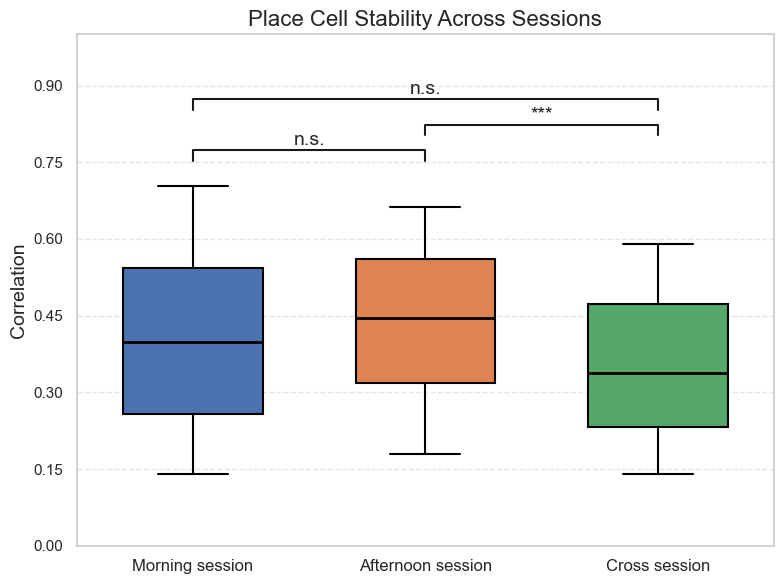

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel
from statsmodels.stats.anova import AnovaRM

# === 0) (If not already loaded) Read your CSV ===
# df = pd.read_csv('your_file.csv', sep='\t')
# df.columns = df.columns.str.strip()

# === 1) Define metrics & labels ===
keys   = [
    'Mean_Morning_vs_Morning',
    'Mean_Afternoon_vs_Afternoon',
    'Mean_Morning_vs_Afternoon'
]
labels = ['Morning session','Afternoon session','Cross session']
colors = ['#4C72B0','#DD8452','#55A868']

# === 2) Melt for repeated‐measures ANOVA ===
long = df.melt(
    id_vars='MouseID',
    value_vars=keys,
    var_name='Session',
    value_name='Correlation'
)
long['Session'] = long['Session'].map(dict(zip(keys, labels)))

# === 3) Repeated‐measures ANOVA ===
aov = AnovaRM(long, 'Correlation', 'MouseID', within=['Session']).fit()
print("Repeated‐Measures ANOVA:")
print(aov.anova_table)

# === 4) Paired t‐tests + Bonferroni correction ===
pairs  = [(0,1),(0,2),(1,2)]
data   = [df[k].dropna().values for k in keys]

t_stats = []
p_unc    = []
for i, j in pairs:
    t, p = ttest_rel(data[i], data[j], nan_policy='omit')
    t_stats.append(t)
    p_unc.append(p)

# Bonferroni‐corrected p-values
p_corr = np.minimum(np.array(p_unc)*len(pairs), 1.0)

print("\nPaired t‐tests (Bonferroni‐corrected):")
for (i,j), t, pu, pc in zip(pairs, t_stats, p_unc, p_corr):
    print(f"{labels[i]:16s} vs {labels[j]:16s}  "
          f"t = {t:6.3f}, p_unc = {pu:.4f}, p_bonf = {pc:.4f}")

# helper to convert p to stars
def p_to_star(p):
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return 'n.s.'

# === 5) Plot ===
sns.set(style='whitegrid')
x = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(8,6))

# boxplots
bp = ax.boxplot(
    data,
    positions=x,
    widths=0.6,
    patch_artist=True,
    boxprops=dict(edgecolor='black', linewidth=1.5),
    medianprops=dict(color='black', linewidth=2),
    whiskerprops=dict(color='black', linewidth=1.5),
    capprops=dict(color='black', linewidth=1.5),
    flierprops=dict(marker='o', color='black', alpha=0.5)
)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# labels & title
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylabel('Correlation', fontsize=14)
ax.set_title('Place Cell Stability Across Sessions', fontsize=16)

# horizontal grid only
ax.yaxis.grid(True, linestyle='--', alpha=0.5)
ax.xaxis.grid(False)

# annotate pairwise brackets
y_max = np.nanmax(data)
bracket = {
    (0,1): y_max + 0.05,
    (0,2): y_max + 0.15,
    (1,2): y_max + 0.10
}
h = 0.02

for (i,j), pc in zip(pairs, p_corr):
    y    = bracket[(i,j)]
    star = p_to_star(pc)
    ax.plot([x[i],x[i],x[j],x[j]], [y, y+h, y+h, y], 'k-', lw=1.5)
    ax.text((x[i]+x[j])/2, y+1.1*h, star, ha='center', va='bottom', fontsize=14)

# === 6) Force y-axis 0–1 with 0.15 steps ===
ax.set_ylim(0, 1.0)
ax.set_yticks(np.arange(0, 1.01, 0.15))

plt.tight_layout()
plt.show()

In [11]:
df = pd.read_excel('Model summary stats.xlsx', sheet_name='Sheet2', header=1)

In [12]:
# Print column headers
print(df.columns.tolist())

['Genotype', 'Perturbation Type', 'Perturbation Level', 'mean correlation across 10 trajectories', 'mean place field size ', 'mean % change in place field size', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'MouseID', 'Genotype.1', 'Mean_Morning_vs_Morning_Correlation', 'Mean_Afternoon_vs_Afternoon_Correlation', 'Mean_Morning_vs_Afternoon_Correlation', 'Mean_Overall_Correlation', 'Mean_place_field (bins)']


In [20]:
# Clean up column names (remove stray whitespace)
df.columns = df.columns.str.strip()

# Prepare AD subset and unique perturbation types
df_ad = df[df['Genotype'] == 'AD']
pert_types = df_ad['Perturbation Type'].unique()

# Create the figure
plt.figure(figsize=(8, 6))

# Plot one line per perturbation type (with error bars)
for ptype in pert_types:
    sub = df_ad[df_ad['Perturbation Type'] == ptype].copy()
    sub = sub.sort_values('Perturbation Level')

    plt.errorbar(
        sub['Perturbation Level'],
        sub['mean correlation'],
        yerr=sub['std correlation'],  # assumes this column exists
        fmt='-o',
        capsize=4,
        label=ptype
    )

# Add WT baseline horizontal line
wt_corr = df[df['Genotype'] == 'WT']['mean correlation'].mean()
plt.axhline(wt_corr, color='k', linestyle='--', linewidth=1.2, label='WT baseline')

# Plot aesthetics
plt.xlabel('Perturbation Level (%)')
plt.ylabel('Mean Correlation')
plt.title('Mean Correlation vs. Perturbation Level')

# Set custom ticks and axis limits
plt.xticks([0.0, 0.01, 0.05, 0.1], ['0%', '1%', '5%', '10%'])
plt.ylim(0.65, 0.78)

# Add grid and legend
plt.grid(alpha=0.3)
plt.legend(title='Perturbation Type', loc='lower left')

plt.tight_layout()
plt.show()

KeyError: 'mean correlation'

<Figure size 800x600 with 0 Axes>

In [17]:
import matplotlib.pyplot as plt

# Clean up any stray whitespace in column names
df.columns = df.columns.str.strip()

# Prepare AD subset
df_ad = df[df['Genotype'] == 'AD']
pert_types = df_ad['Perturbation Type'].unique()

# Create the figure
plt.figure(figsize=(8, 6))

# Plot one line per AD perturbation type
for ptype in pert_types:
    sub = df_ad[df_ad['Perturbation Type'] == ptype].copy()
    sub = sub.sort_values('Perturbation Level')
    plt.plot(
        sub['Perturbation Level'],
        sub['mean correlation'],
        marker='o',
        label=ptype
    )

# Add WT baseline horizontal line
wt_corr = df[df['Genotype'] == 'WT']['mean correlation'].mean()
plt.axhline(wt_corr, color='k', linestyle='--', label='WT baseline')

# Labels, title, legend
plt.xlabel('Perturbation Level (%)')
plt.ylabel('Mean Correlation')
plt.title('Mean Correlation vs. Perturbation Level')
plt.ylim(0, 1)
plt.legend(title='Perturbation Type', loc='best')
plt.tight_layout()
plt.show()

KeyError: 'mean correlation'

<Figure size 800x600 with 0 Axes>

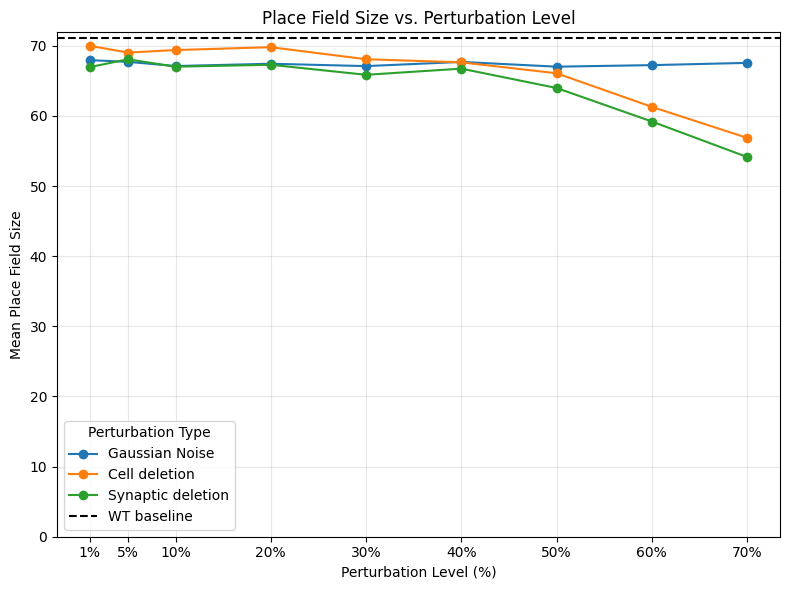

In [21]:
import matplotlib.pyplot as plt

# Clean up any stray whitespace in column names
df.columns = df.columns.str.strip()

# Prepare AD subset and get unique perturbation types
df_ad = df[df['Genotype'] == 'AD']
pert_types = df_ad['Perturbation Type'].unique()

# Create the figure
plt.figure(figsize=(8, 6))

# Plot one line per AD perturbation type
for ptype in pert_types:
    sub = df_ad[df_ad['Perturbation Type'] == ptype].copy()
    sub = sub.sort_values('Perturbation Level')
    plt.plot(
        sub['Perturbation Level'],
        sub['mean place field size'],
        marker='o',
        label=ptype
    )

# Add WT baseline horizontal line
wt_mean_field_size = df[df['Genotype'] == 'WT']['mean place field size'].mean()
plt.axhline(wt_mean_field_size, color='k', linestyle='--', label='WT baseline')

# Labels, title, legend
plt.xlabel('Perturbation Level (%)')
plt.ylabel('Mean Place Field Size')
plt.title('Place Field Size vs. Perturbation Level')
plt.xticks(sub['Perturbation Level'], [f'{int(x * 100)}%' for x in sub['Perturbation Level']])
plt.ylim(0, None)
plt.legend(title='Perturbation Type', loc='best')

plt.tight_layout()
plt.grid(alpha=0.3)
plt.show()

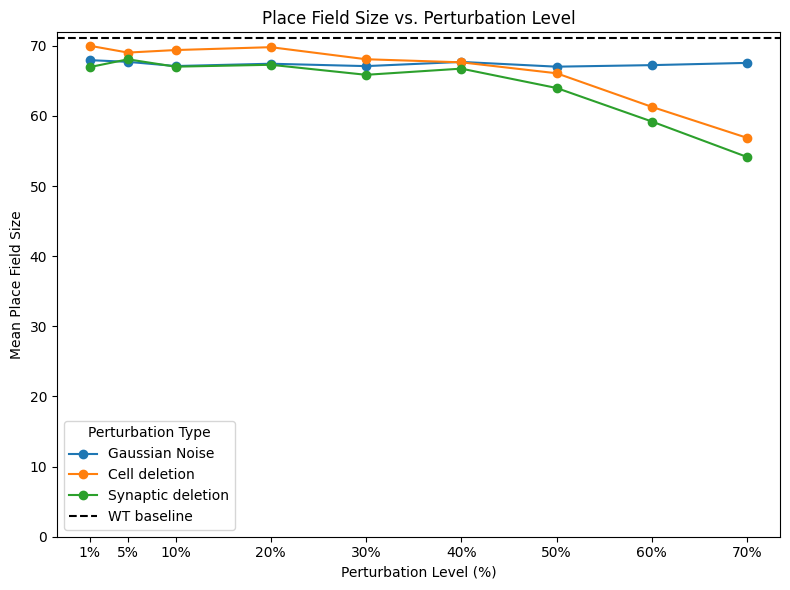

In [22]:
import matplotlib.pyplot as plt

# Clean up any stray whitespace in column names
df.columns = df.columns.str.strip()

# Prepare AD subset and get unique perturbation types
df_ad = df[df['Genotype'] == 'AD']
pert_types = df_ad['Perturbation Type'].unique()

# Create the figure
plt.figure(figsize=(8, 6))

# Plot one line per AD perturbation type
for ptype in pert_types:
    sub = df_ad[df_ad['Perturbation Type'] == ptype].copy()
    sub = sub.sort_values('Perturbation Level')
    plt.plot(
        sub['Perturbation Level'],
        sub['mean place field size'],
        marker='o',
        label=ptype
    )

# Add WT baseline horizontal line
wt_mean_field_size = df[df['Genotype'] == 'WT']['mean place field size'].mean()
plt.axhline(wt_mean_field_size, color='k', linestyle='--', label='WT baseline')

# Labels, title, legend
plt.xlabel('Perturbation Level (%)')
plt.ylabel('Mean Place Field Size')
plt.title('Place Field Size vs. Perturbation Level')
plt.xticks(sub['Perturbation Level'], [f'{int(x * 100)}%' for x in sub['Perturbation Level']])
plt.ylim(0, None)
plt.legend(title='Perturbation Type', loc='best')

plt.tight_layout()
plt.grid(False)  # Turn off background grid
plt.show()

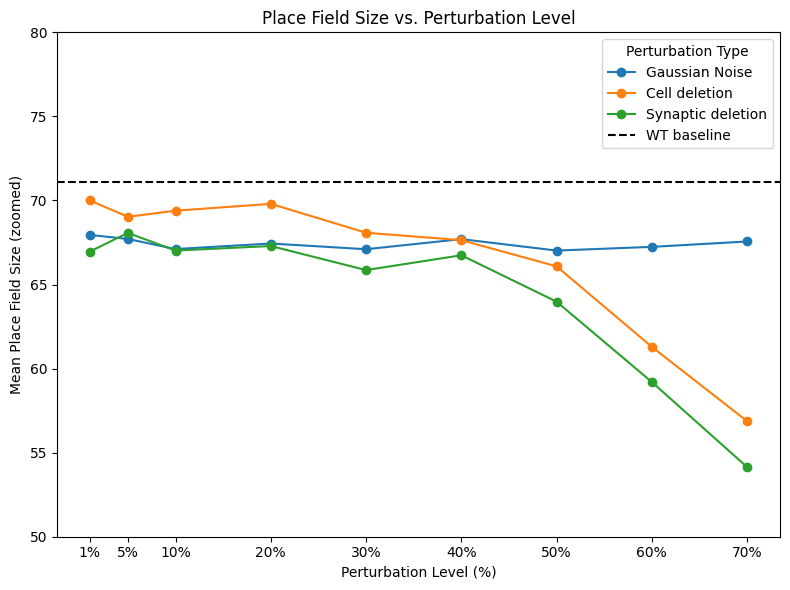

In [23]:
import matplotlib.pyplot as plt

# Clean up any stray whitespace in column names
df.columns = df.columns.str.strip()

# Prepare AD subset and get unique perturbation types
df_ad = df[df['Genotype'] == 'AD']
pert_types = df_ad['Perturbation Type'].unique()

# Create the figure
plt.figure(figsize=(8, 6))

# Plot one line per AD perturbation type
for ptype in pert_types:
    sub = df_ad[df_ad['Perturbation Type'] == ptype].copy()
    sub = sub.sort_values('Perturbation Level')
    plt.plot(
        sub['Perturbation Level'],
        sub['mean place field size'],
        marker='o',
        label=ptype
    )

# Add WT baseline horizontal line
wt_mean_field_size = df[df['Genotype'] == 'WT']['mean place field size'].mean()
plt.axhline(wt_mean_field_size, color='k', linestyle='--', label='WT baseline')

# Labels, title, legend
plt.xlabel('Perturbation Level (%)')
plt.ylabel('Mean Place Field Size (zoomed)')
plt.title('Place Field Size vs. Perturbation Level')
plt.xticks(sub['Perturbation Level'], [f'{int(x * 100)}%' for x in sub['Perturbation Level']])

# Zoom in on y-axis
plt.ylim(50, 80)  # Adjust as needed for your data range

# Turn off background grid
plt.grid(False)

# Add legend
plt.legend(title='Perturbation Type', loc='best')

plt.tight_layout()
plt.show()

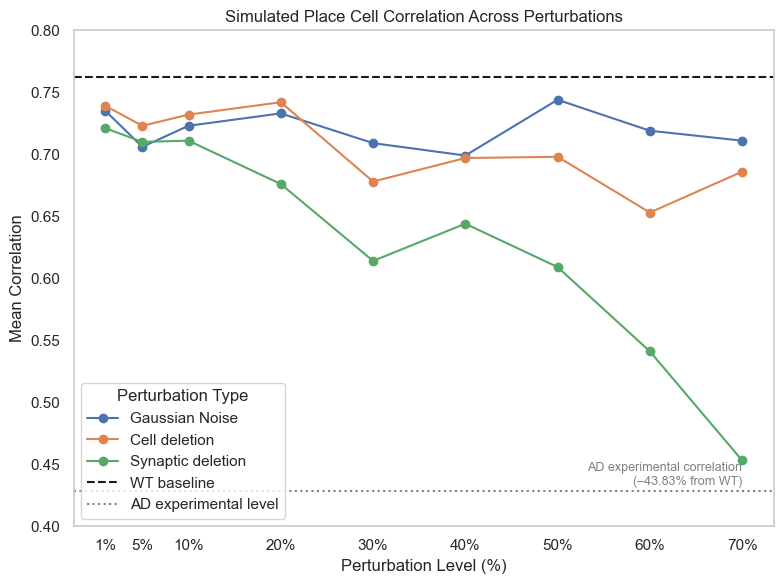

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Clean up any stray whitespace in column names
df.columns = df.columns.str.strip()

# Prepare AD subset and get unique perturbation types
df_ad = df[df['Genotype'] == 'AD']
pert_types = df_ad['Perturbation Type'].unique()

# Create the figure
plt.figure(figsize=(8, 6))

# Plot one line per AD perturbation type
for ptype in pert_types:
    sub = df_ad[df_ad['Perturbation Type'] == ptype].copy()
    sub = sub.sort_values('Perturbation Level')
    plt.plot(
        sub['Perturbation Level'],
        sub['mean correlation across 10 trajectories'],
        marker='o',
        label=ptype
    )

# Add WT baseline horizontal line
wt_mean_corr = df[df['Genotype'] == 'WT']['mean correlation across 10 trajectories'].mean()
plt.axhline(wt_mean_corr, color='k', linestyle='--', label='WT baseline')

# Add AD experimental value line (WT - 43.83%)
ad_exp_corr = wt_mean_corr * (1 - 0.4383)
plt.axhline(ad_exp_corr, color='gray', linestyle=':', label='AD experimental level')

# Annotate the AD experimental line
plt.text(
    x=sub['Perturbation Level'].max(), 
    y=ad_exp_corr + 0.005, 
    s='AD experimental correlation\n(–43.83% from WT)', 
    fontsize=9, 
    color='gray', 
    ha='right'
)

# Labels, title, legend
plt.xlabel('Perturbation Level (%)')
plt.ylabel('Mean Correlation')
plt.title('Simulated Place Cell Correlation Across Perturbations')
plt.xticks(sub['Perturbation Level'], [f'{int(x * 100)}%' for x in sub['Perturbation Level']])

# Zoom in on y-axis
plt.ylim(0.4, 0.8)  # Adjust this range depending on your data

# Turn off background grid
plt.grid(False)

# Add legend
plt.legend(title='Perturbation Type', loc='lower left')

plt.tight_layout()
plt.show()

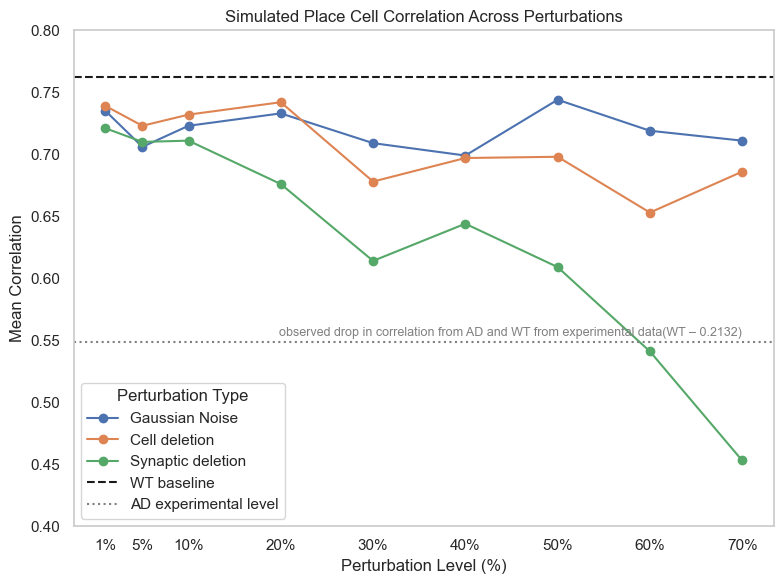

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Clean up any stray whitespace in column names
df.columns = df.columns.str.strip()

# Prepare AD subset and get unique perturbation types
df_ad = df[df['Genotype'] == 'AD']
pert_types = df_ad['Perturbation Type'].unique()

# Create the figure
plt.figure(figsize=(8, 6))

# Plot one line per AD perturbation type
for ptype in pert_types:
    sub = df_ad[df_ad['Perturbation Type'] == ptype].copy()
    sub = sub.sort_values('Perturbation Level')
    plt.plot(
        sub['Perturbation Level'],
        sub['mean correlation across 10 trajectories'],
        marker='o',
        label=ptype
    )

# Add WT baseline horizontal line
wt_mean_corr = df[df['Genotype'] == 'WT']['mean correlation across 10 trajectories'].mean()
plt.axhline(wt_mean_corr, color='k', linestyle='--', label='WT baseline')

# Add AD experimental value line (WT - 0.2132)
ad_exp_corr = wt_mean_corr - 0.2132
plt.axhline(ad_exp_corr, color='gray', linestyle=':', label='AD experimental level')

# Annotate the AD experimental line
plt.text(
    x=sub['Perturbation Level'].max(), 
    y=ad_exp_corr + 0.005, 
    s='observed drop in correlation from AD and WT from experimental data(WT – 0.2132)', 
    fontsize=9, 
    color='gray', 
    ha='right'
)

# Labels, title, legend
plt.xlabel('Perturbation Level (%)')
plt.ylabel('Mean Correlation')
plt.title('Simulated Place Cell Correlation Across Perturbations')
plt.xticks(sub['Perturbation Level'], [f'{int(x * 100)}%' for x in sub['Perturbation Level']])

# Zoom in on y-axis
plt.ylim(0.4, 0.8)  # Adjust this range depending on your data

# Turn off background grid
plt.grid(False)

# Add legend
plt.legend(title='Perturbation Type', loc='lower left')

plt.tight_layout()
plt.show()

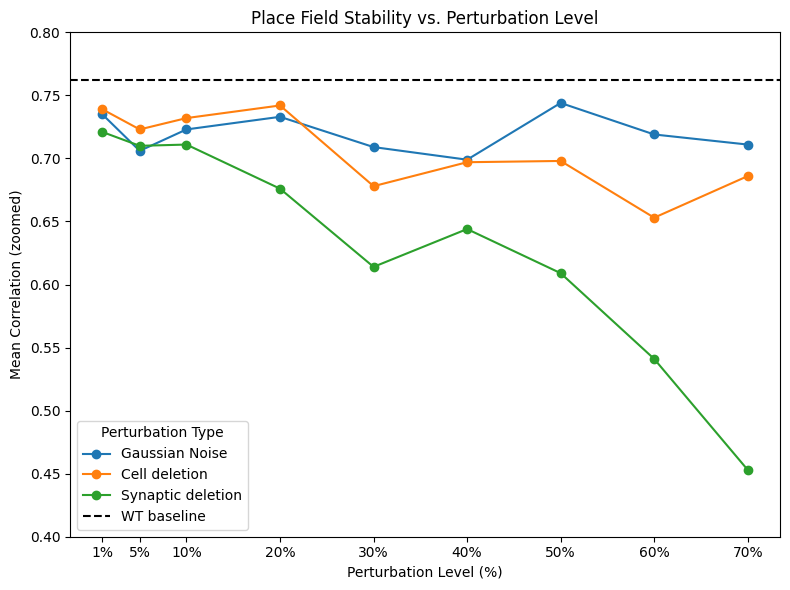

In [26]:
import matplotlib.pyplot as plt

# Clean up any stray whitespace in column names
df.columns = df.columns.str.strip()

# Prepare AD subset and get unique perturbation types
df_ad = df[df['Genotype'] == 'AD']
pert_types = df_ad['Perturbation Type'].unique()

# Create the figure
plt.figure(figsize=(8, 6))

# Plot one line per AD perturbation type
for ptype in pert_types:
    sub = df_ad[df_ad['Perturbation Type'] == ptype].copy()
    sub = sub.sort_values('Perturbation Level')
    plt.plot(
        sub['Perturbation Level'],
        sub['mean correlation across 10 trajectories'],
        marker='o',
        label=ptype
    )

# Add WT baseline horizontal line
wt_mean_corr = df[df['Genotype'] == 'WT']['mean correlation across 10 trajectories'].mean()
plt.axhline(wt_mean_corr, color='k', linestyle='--', label='WT baseline')

# Labels, title, legend
plt.xlabel('Perturbation Level (%)')
plt.ylabel('Mean Correlation (zoomed)')
plt.title('Place Field Stability vs. Perturbation Level')
plt.xticks(sub['Perturbation Level'], [f'{int(x * 100)}%' for x in sub['Perturbation Level']])

# Zoom in on y-axis
plt.ylim(0.4, 0.8)  # Adjust this range depending on your data

# Turn off background grid
plt.grid(False)

# Add legend
plt.legend(title='Perturbation Type', loc='lower left')

plt.tight_layout()
plt.show()

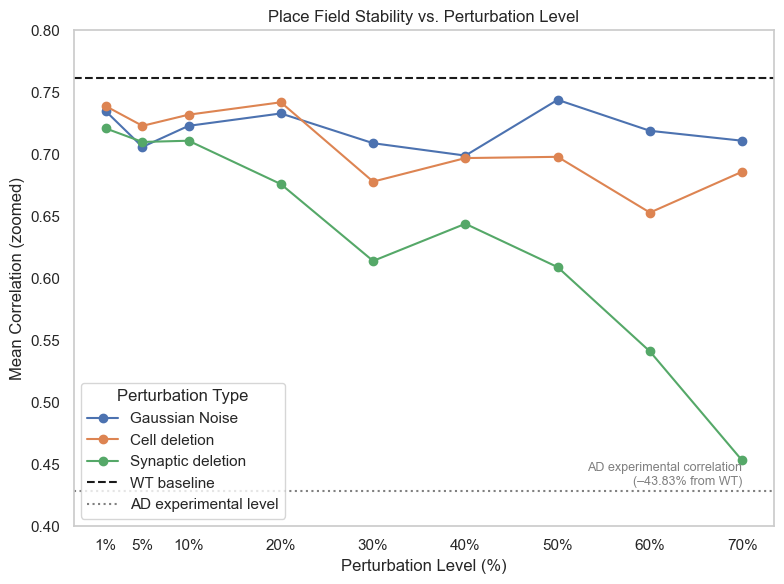

In [ ]:
import matplotlib.pyplot as plt

# Clean up any stray whitespace in column names
df.columns = df.columns.str.strip()

# Prepare AD subset and get unique perturbation types
df_ad = df[df['Genotype'] == 'AD']
pert_types = df_ad['Perturbation Type'].unique()

# Create the figure
plt.figure(figsize=(8, 6))

# Plot one line per AD perturbation type
for ptype in pert_types:
    sub = df_ad[df_ad['Perturbation Type'] == ptype].copy()
    sub = sub.sort_values('Perturbation Level')
    plt.plot(
        sub['Perturbation Level'],
        sub['mean correlation across 10 trajectories'],
        marker='o',
        label=ptype
    )

# Add WT baseline horizontal line
wt_mean_corr = df[df['Genotype'] == 'WT']['mean correlation across 10 trajectories'].mean()
plt.axhline(wt_mean_corr, color='k', linestyle='--', label='WT baseline')

# Add AD experimental value line (WT - 43.83%)
ad_exp_corr = wt_mean_corr * (1 - 0.4383)
plt.axhline(ad_exp_corr, color='gray', linestyle=':', label='AD experimental level')

# Annotate the AD line
plt.text(
    x=sub['Perturbation Level'].max(), 
    y=ad_exp_corr + 0.005, 
    s='AD experimental correlation\n(–43.83% from WT)', 
    fontsize=9, 
    color='gray', 
    ha='right'
)

# Labels, title, legend
plt.xlabel('Perturbation Level (%)')
plt.ylabel('Mean Correlation')
plt.title('Place Field Stability vs. Perturbation Level')
plt.xticks(sub['Perturbation Level'], [f'{int(x * 100)}%' for x in sub['Perturbation Level']])

# Zoom in on y-axis
plt.ylim(0.4, 0.8)  # Adjust this range depending on your data

# Turn off background grid
plt.grid(False)

# Add legend
plt.legend(title='Perturbation Type', loc='lower left')

plt.tight_layout()
plt.show()

% Change (AD vs WT): -3.32%
p-value: 0.883


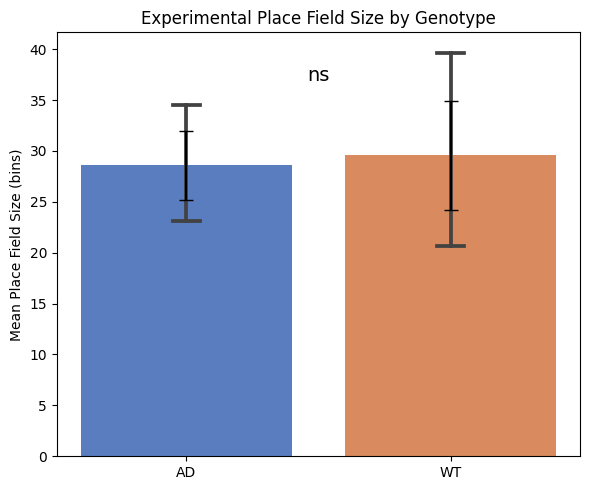

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import numpy as np

# Load your Excel file (make sure it's in the same directory or adjust the path)
df = pd.read_excel("Model summary stats.xlsx", sheet_name="Sheet2", header=1)

# Clean column names
df.columns = df.columns.str.strip()

# Extract genotype and place field size data
exp_df = df[['Genotype.1', 'Mean_place_field (bins)']].dropna()
exp_df.columns = ['Genotype', 'PlaceFieldSize']

# Group statistics
group_stats = exp_df.groupby('Genotype')['PlaceFieldSize'].agg(['mean', 'std', 'count'])
group_stats['sem'] = group_stats['std'] / np.sqrt(group_stats['count'])

# t-test between WT and AD
wt = exp_df[exp_df['Genotype'] == 'WT']['PlaceFieldSize']
ad = exp_df[exp_df['Genotype'] == 'AD']['PlaceFieldSize']
t_stat, p_val = ttest_ind(wt, ad)

# % change from WT to AD
percent_change = ((ad.mean() - wt.mean()) / wt.mean()) * 100
print(f"% Change (AD vs WT): {percent_change:.2f}%")
print(f"p-value: {p_val:.3f}")

# Plot
plt.figure(figsize=(6, 5))
sns.barplot(data=exp_df, x='Genotype', y='PlaceFieldSize', palette='muted', capsize=0.1)

# Add manual error bars
plt.errorbar(['AD', 'WT'],
             group_stats.loc[['AD', 'WT'], 'mean'],
             yerr=group_stats.loc[['AD', 'WT'], 'sem'],
             fmt='none', c='black', capsize=5)

# Add significance asterisk
if p_val < 0.001:
    sig = '***'
elif p_val < 0.01:
    sig = '**'
elif p_val < 0.05:
    sig = '*'
else:
    sig = 'ns'

# Position asterisk
y_max = group_stats['mean'].max() + group_stats['sem'].max() + 2
plt.text(0.5, y_max, sig, ha='center', fontsize=14)

# Formatting
plt.title('Experimental Place Field Size by Genotype')
plt.ylabel('Mean Place Field Size (bins)')
plt.xlabel('')
plt.tight_layout()
plt.grid(False)
plt.show()

In [9]:
import matplotlib.pyplot as plt

# Clean up column names (remove stray whitespace)
df.columns = df.columns.str.strip()

# Prepare AD subset and unique perturbation types
df_ad = df[df['Genotype'] == 'AD']
pert_types = df_ad['Perturbation Type'].unique()

# Create the figure
plt.figure(figsize=(8, 6))

# Plot one line per perturbation type (with error bars)
for ptype in pert_types:
    sub = df_ad[df_ad['Perturbation Type'] == ptype].copy()
    sub = sub.sort_values('Perturbation Level')

    plt.errorbar(
        sub['Perturbation Level'],
        sub['mean correlation'],
        yerr=sub['std correlation'],  # assumes this column exists
        fmt='-o',
        capsize=4,
        label=ptype
    )

# Add WT baseline horizontal line
wt_corr = df[df['Genotype'] == 'WT']['mean correlation'].mean()
plt.axhline(wt_corr, color='k', linestyle='--', linewidth=1.2, label='WT baseline')

# Plot aesthetics
plt.xlabel('Perturbation Level (%)')
plt.ylabel('Mean Correlation')
plt.title('Mean Correlation vs. Perturbation Level')

# Set custom ticks and axis limits
plt.xticks([0.0, 0.01, 0.05, 0.1], ['0%', '1%', '5%', '10%'])
plt.ylim(0.65, 0.78)

# Add grid and legend
plt.grid(alpha=0.3)
plt.legend(title='Perturbation Type', loc='lower left')

plt.tight_layout()
plt.show()

KeyError: 'std correlation'

<Figure size 800x600 with 0 Axes>

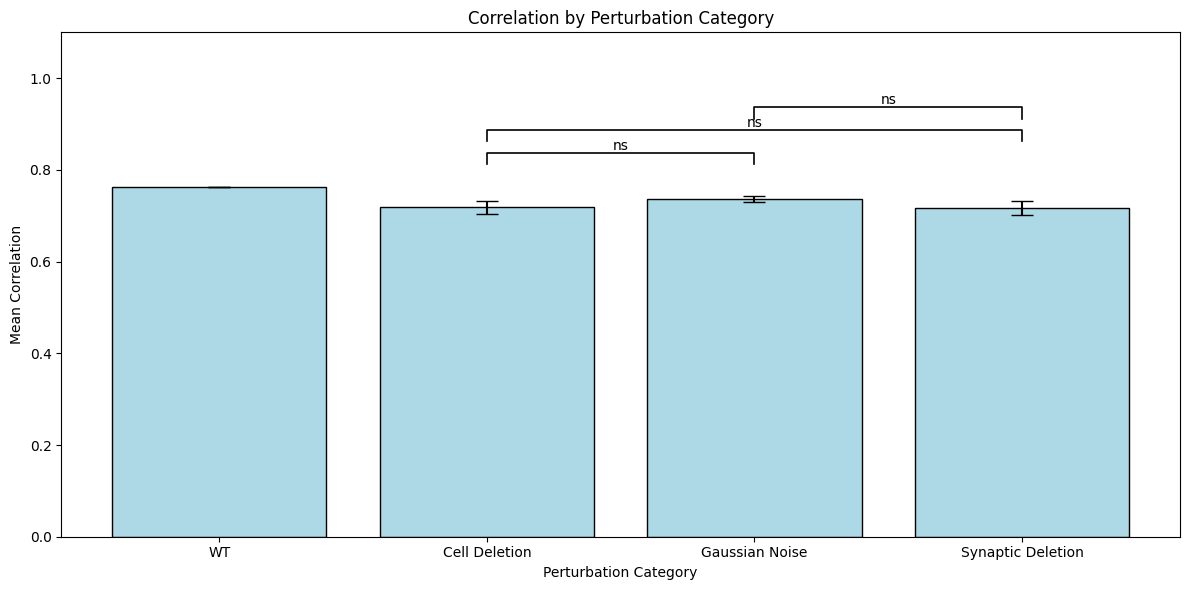

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, sem
from itertools import combinations

# 1. Clean column names
df.columns = df.columns.str.strip()

# 2. Create a single “Category” column: 'WT' or the AD perturbation type
df['Category'] = np.where(df['Genotype'] == 'WT', 'WT', df['Perturbation Type'])

# 3. Define ordering: WT first, then sorted AD types
categories = ['WT'] + sorted(df[df['Genotype'] == 'AD']['Perturbation Type'].unique())

# 4. Gather data per category
data = [df.loc[df['Category'] == cat, 'mean correlation'].dropna() for cat in categories]

# Compute means and SEMs
means = [np.mean(d) if len(d) > 0 else np.nan for d in data]
errors = [sem(d, nan_policy='omit') if len(d) > 1 else 0 for d in data]

# 5. Draw bar plot with error bars
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(categories))
ax.bar(x, means, yerr=errors, capsize=8, color='lightblue', edgecolor='k')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_xlabel('Perturbation Category')
ax.set_ylabel('Mean Correlation')
ax.set_title('Correlation by Perturbation Category')
ax.set_ylim(0, 1.1)

# 6. Pairwise t-tests with significance stars
y_max = max(m + e for m, e in zip(means, errors))
h = 0.05
step = 0

for (i, cat1), (j, cat2) in combinations(list(enumerate(categories)), 2):
    vals1, vals2 = data[i], data[j]
    if len(vals1) < 2 or len(vals2) < 2:
        continue
    _, p = ttest_ind(vals1, vals2, nan_policy='omit')
    if p < 0.001:
        star = '***'
    elif p < 0.01:
        star = '**'
    elif p < 0.05:
        star = '*'
    else:
        star = 'ns'

    x1, x2 = i, j
    y = y_max + h * (step + 1)
    ax.plot([x1, x1, x2, x2], [y, y + h/2, y + h/2, y], c='k', lw=1.2)
    ax.text((x1 + x2) / 2, y + h/2, star, ha='center', va='bottom')
    step += 1

plt.tight_layout()
plt.show()

In [23]:
df.columns = df.columns.str.strip()
df['Category'] = np.where(df['Genotype']=='WT','WT',df['Perturbation Type'])
categories = ['WT'] + sorted(df[df['Genotype']=='AD']['Perturbation Type'].unique())

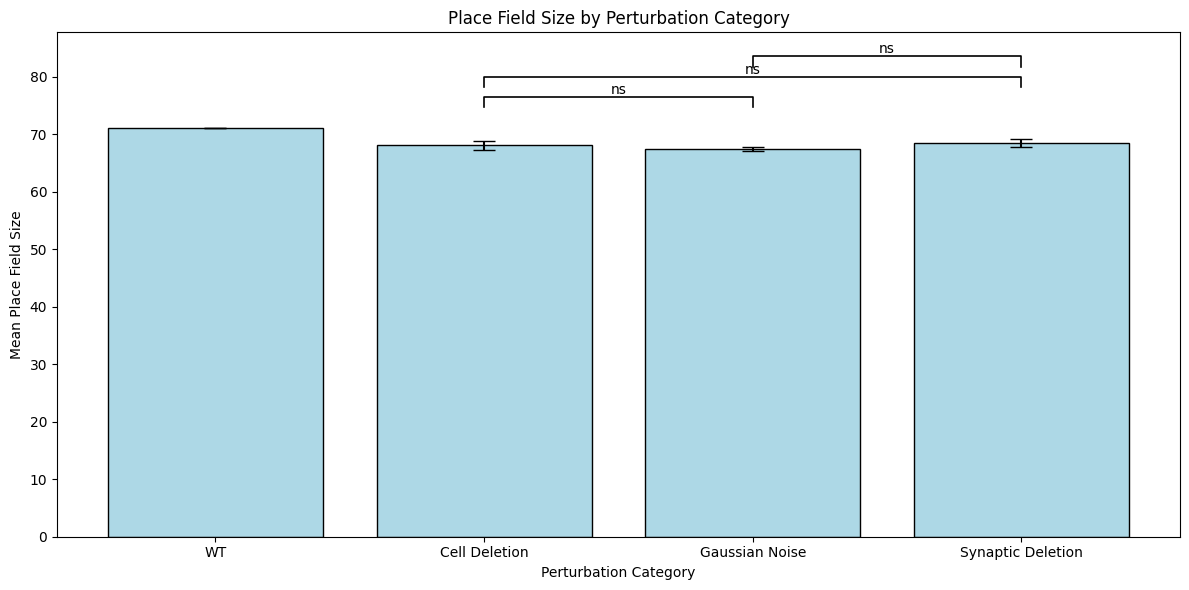

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, sem
from itertools import combinations

# 4. Gather data per category for place field size
data_size = [
    df.loc[df['Category'] == cat, 'mean place field size'].dropna()
    for cat in categories
]

# Calculate mean and SEM for each category
means = [np.mean(d) if len(d) > 0 else np.nan for d in data_size]
errors = [sem(d, nan_policy='omit') if len(d) > 1 else 0 for d in data_size]

# 5. Draw the bar plot with error bars
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(categories))
ax.bar(x, means, yerr=errors, capsize=8, color='lightblue', edgecolor='k')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.set_xlabel('Perturbation Category')
ax.set_ylabel('Mean Place Field Size')
ax.set_title('Place Field Size by Perturbation Category')

# 6. All pairwise t-tests and annotate brackets
y_max = max(m + e for m, e in zip(means, errors))
h = y_max * 0.05
step = 0

for (i, cat1), (j, cat2) in combinations(list(enumerate(categories)), 2):
    vals1, vals2 = data_size[i], data_size[j]
    if len(vals1) < 2 or len(vals2) < 2:
        continue
    _, p = ttest_ind(vals1, vals2, nan_policy='omit')
    if p < 0.001:
        star = '***'
    elif p < 0.01:
        star = '**'
    elif p < 0.05:
        star = '*'
    else:
        star = 'ns'

    x1, x2 = i, j
    y = y_max + h * (step + 1)
    ax.plot([x1, x1, x2, x2], [y, y + h / 2, y + h / 2, y], c='k', lw=1.2)
    ax.text((x1 + x2) / 2, y + h / 2, star, ha='center', va='bottom')
    step += 1

plt.tight_layout()
plt.show()

/var/folders/5n/kdl3dytn7171_kqch0_4jk2c0000gn/T/ipykernel_24761/1307418764.py:19: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(data_pct, labels=categories, patch_artist=True)


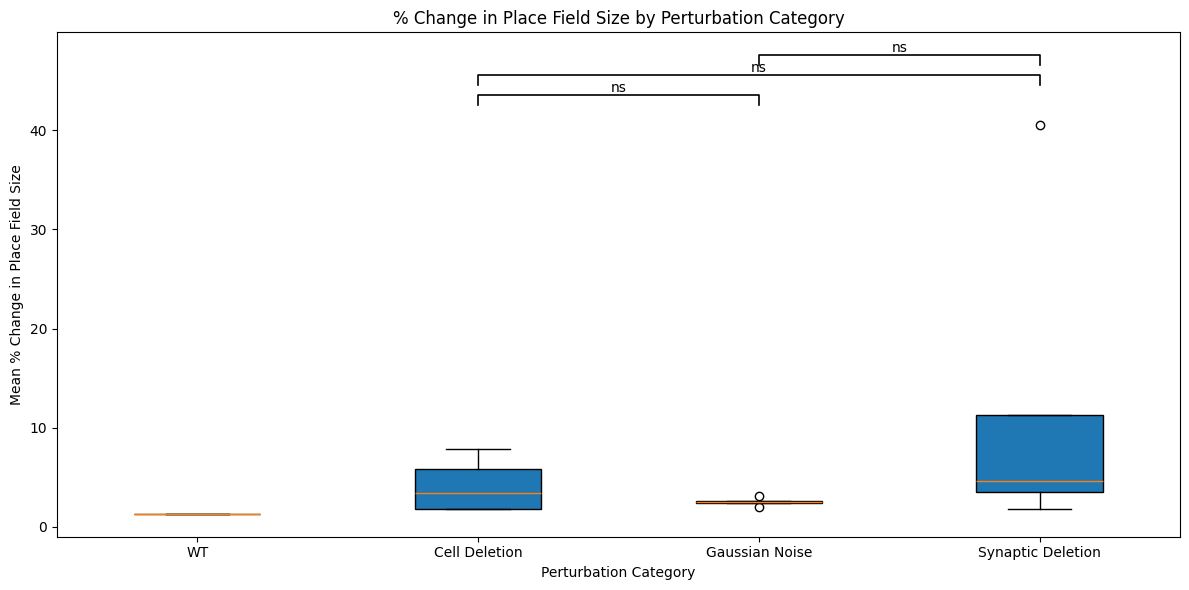

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from itertools import combinations

# (Assumes you’ve already run:)
# df.columns = df.columns.str.strip()
# df['Category'] = np.where(df['Genotype']=='WT','WT',df['Perturbation Type'])
# categories = ['WT'] + sorted(df[df['Genotype']=='AD']['Perturbation Type'].unique())

# 1. Gather data per category for % change in field size
data_pct = [
    df.loc[df['Category']==cat, 'mean % change in place field size'].dropna()
    for cat in categories
]

# 2. Draw the boxplots
fig, ax = plt.subplots(figsize=(12, 6))
ax.boxplot(data_pct, labels=categories, patch_artist=True)
ax.set_xlabel('Perturbation Category')
ax.set_ylabel('Mean % Change in Place Field Size')
ax.set_title('% Change in Place Field Size by Perturbation Category')
plt.xticks(rotation=0)

# 3. All pairwise t-tests and annotate brackets
y_max = max(d.max() if len(d)>0 else 0 for d in data_pct)
h = y_max * 0.05  # 5% of the max for vertical spacing
step = 0

for (i, cat1), (j, cat2) in combinations(list(enumerate(categories)), 2):
    vals1, vals2 = data_pct[i], data_pct[j]
    if len(vals1) < 2 or len(vals2) < 2:
        continue
    _, p = ttest_ind(vals1, vals2, nan_policy='omit')
    if p < 0.001:
        star = '***'
    elif p < 0.01:
        star = '**'
    elif p < 0.05:
        star = '*'
    else:
        star = 'ns'

    x1, x2 = i+1, j+1
    y = y_max + h * (step + 1)
    ax.plot([x1, x1, x2, x2],
            [y, y+h/2, y+h/2, y],
            c='k', lw=1.2)
    ax.text((x1+x2)/2, y+h/2, star, ha='center', va='bottom')
    step += 1

plt.tight_layout()
plt.show()